<a href="https://colab.research.google.com/github/kakods/2048/blob/master/Stanford_Dog_Breeds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup


These commands are used to display matplotlib plots and to autoreload the library, which means that if someone changes the library while you are executing the code, the changes will be reflected

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline  

importing fastai

In [0]:
from fastai import *
from fastai.vision import *

# Dataset

To get dataset from Kaggle, upload your kaggle.json file (https://stackoverflow.com/questions/49310470/using-kaggle-datasets-in-google-colab follow the first two steps from this guide) and then run the following commands

In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle competitions download -c dog-breed-identification
!mkdir data
!mkdir data/dog_breeds && unzip labels.csv.zip -d data/dog_breeds/ && unzip test.zip -d data/dog_breeds/ && unzip train.zip -d data/dog_breeds/

labels.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.zip: Skipping, found more recently modified local copy (use --force to force download)
train.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  labels.csv.zip
  inflating: data/dog_breeds/labels.csv  
Archive:  test.zip
   creating: data/dog_breeds/test/
  inflating: data/dog_breeds/test/000621fb3cbb32d8935728e48679680e.jpg  
  inflating: data/dog_breeds/test/00102ee9d8eb90812350685311fe5890.jpg  
  inflating: data/dog_breeds/test/0012a730dfa437f5f3613fb75efcd4ce.jpg  
  inflating: data/dog_breeds/test/001510bc8570bbeee98c8d80c8a95ec1.jpg  
  inflating: data/dog_breeds/test/001a5f3114548acdefa3d4da05474c2e.jpg  
  inflating: data/dog_breeds/test/00225dcd3e4d2410dd53239f95c0352f.jpg  
  inflating: data/dog_breeds/test/002c2a3117c2193

To set the path where the model will be saved, create a Path() object with folder name as the argument

In [0]:
path=Path('data/dog_breeds')

To check the contents of the dataset, we can use methods like ls() or get_file_names and show image from fastai

In [0]:
path.ls()

[PosixPath('data/dog_breeds/test'),
 PosixPath('data/dog_breeds/train'),
 PosixPath('data/dog_breeds/labels.csv')]

In [0]:
fnames=get_image_files(path/'train');fnames[0]

PosixPath('data/dog_breeds/train/c52852b1d9ab94c9ebb948c38dfd1bf3.jpg')

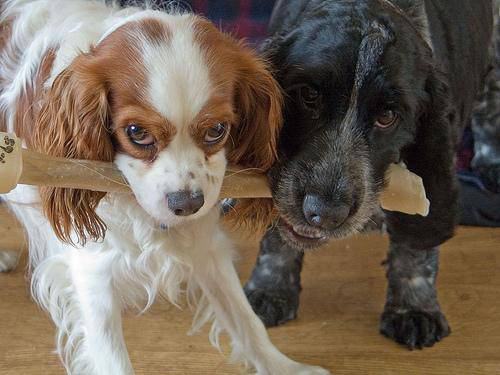

In [0]:
open_image(fnames[0])

To check the contents of the csv file we can use read_csv method of Pandas library

In [0]:
df=pd.read_csv(path/'labels.csv')

In [0]:
df.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

It contains the file name without the .jpg extension and the breed of every file in the training dataset

# Creating the model data

fastai creates a databunch which contains the train valid and test datasets along with the transforms, batch size and the size of every image



In [0]:
data=ImageDataBunch.from_csv(path,folder='train',csv_labels='labels.csv',valid_pct=0.2,seed=2,test='test',ds_tfms=get_transforms(),size=224,bs=64,suffix='.jpg').normalize(imagenet_stats)

https://docs.fast.ai/vision.transform.html#get_transforms
1.   Here, folder contains the images or folders which contain images. Dataset provided by kaggle has 120 folders in the train dataset. 
2.   20% of the dataset is set as the validation set,
3. test set can be provided by giving the name of the folder which contains test images
4. ds_tfms gives the list of transforms. It is set to defaults provided by the library but can be modified by changing the arguments of the function. https://docs.fast.ai/vision.transform.html#get_transforms
5. All the images are resized tp 224 and batch size is set to 64
6. The entire databunch is normalized to imagenet stats because it is to be trained on resnet
7. suffix is set to .jpg because csv file does not contain .jpg extension

All these methods can be written step by step using datablock api https://docs.fast.ai/data_block.html

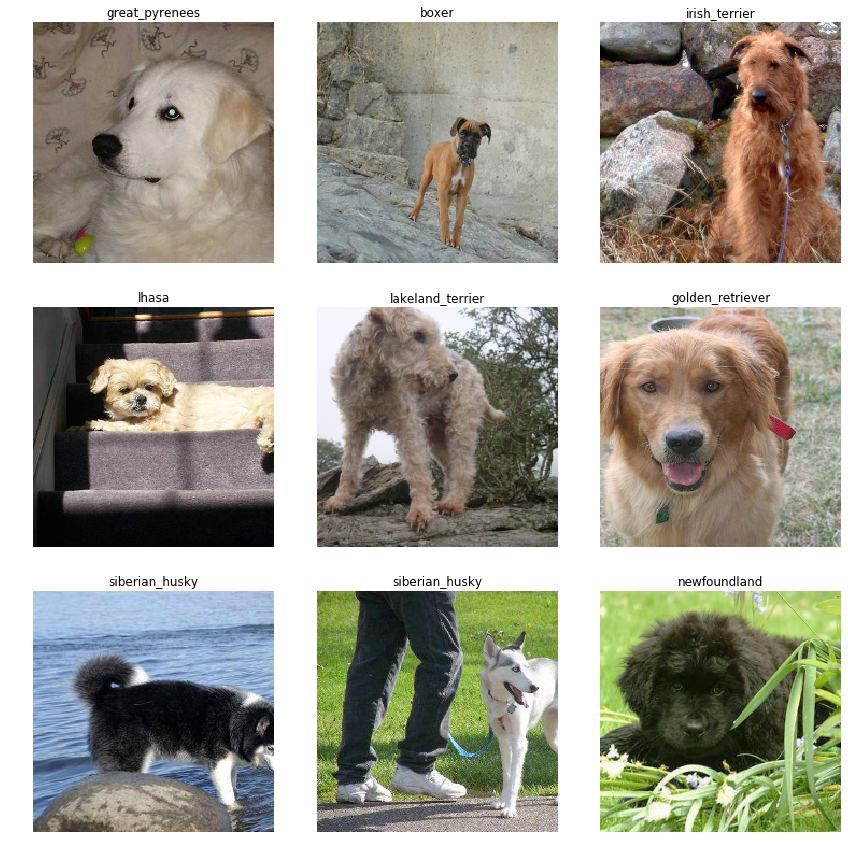

In [34]:
data.show_batch(rows=3)

# Creating the learner

In [35]:
learn=cnn_learner(data,models.resnet101,metrics=[accuracy])

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth
100%|██████████| 178728960/178728960 [00:01<00:00, 102347212.64it/s]


List of different models can be checked by hitting tab after typing models.

# Training

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


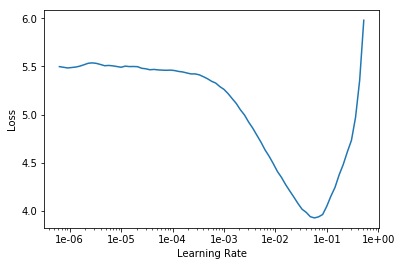

In [37]:
learn.lr_find()
learn.recorder.plot()

Learning rate is set to a value which has steepest slope. I chose 0.02 but feel free to experiment

In [38]:
learn.fit_one_cycle(5,1e-2)

Should be trained for more epochs.

In [0]:
learn.save('stage-1')

In [40]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (8178 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
boston_bull,dingo,pekinese,golden_retriever,bedlington_terrier
Path: data/dog_breeds;

Valid: LabelList (2044 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
staffordshire_bullterrier,welsh_springer_spaniel,german_shepherd,clumber,entlebucher
Path: data/dog_breeds;

Test: LabelList (10357 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: data/dog_breeds, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


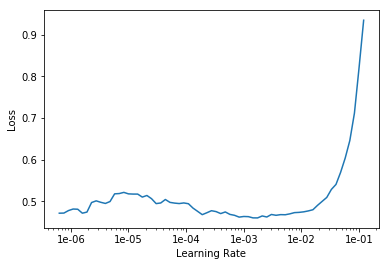

In [41]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.unfreeze()

For fine tuning, slice method takes two learning rates, first one is set to a very low value like 0.000006 for the  pretrained model and the other value is set to initial learning rate/10. Can be experimented with new values

In [43]:
learn.fit_one_cycle(3,slice(1e-6,1e-3))

Should be trained for more time

In [0]:
learn.save('stage-2')

In [46]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (8178 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
boston_bull,dingo,pekinese,golden_retriever,bedlington_terrier
Path: data/dog_breeds;

Valid: LabelList (2044 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
staffordshire_bullterrier,welsh_springer_spaniel,german_shepherd,clumber,entlebucher
Path: data/dog_breeds;

Test: LabelList (10357 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: data/dog_breeds, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3

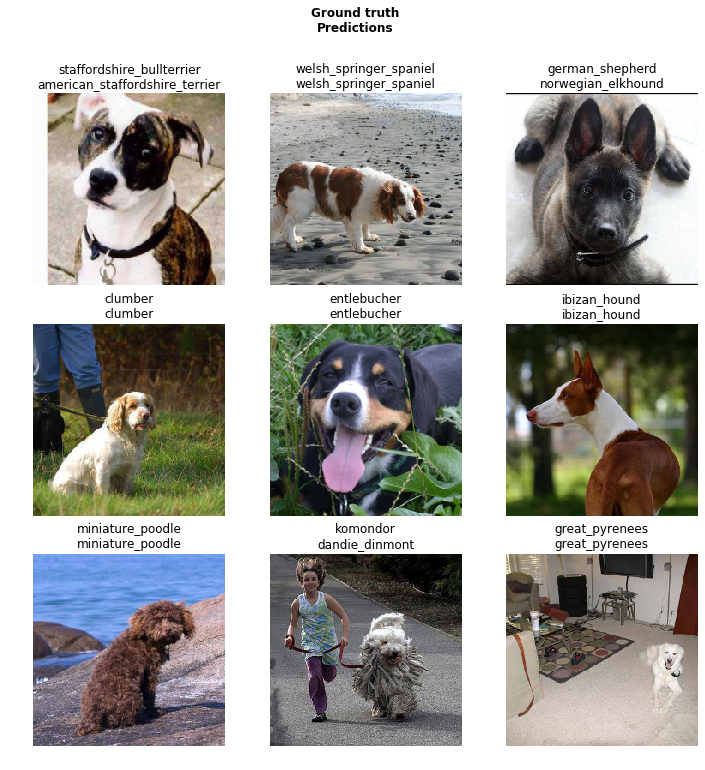

In [44]:
learn.show_results(rows=3)

# Analysis

In [47]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (8178 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
boston_bull,dingo,pekinese,golden_retriever,bedlington_terrier
Path: data/dog_breeds;

Valid: LabelList (2044 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
staffordshire_bullterrier,welsh_springer_spaniel,german_shepherd,clumber,entlebucher
Path: data/dog_breeds;

Test: LabelList (10357 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: data/dog_breeds, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3

In [0]:
interp=ClassificationInterpretation.from_learner(learn)

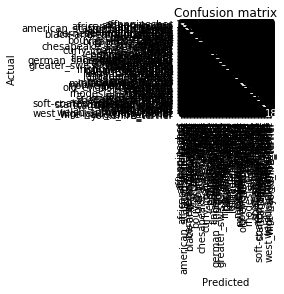

In [49]:
interp.plot_confusion_matrix()

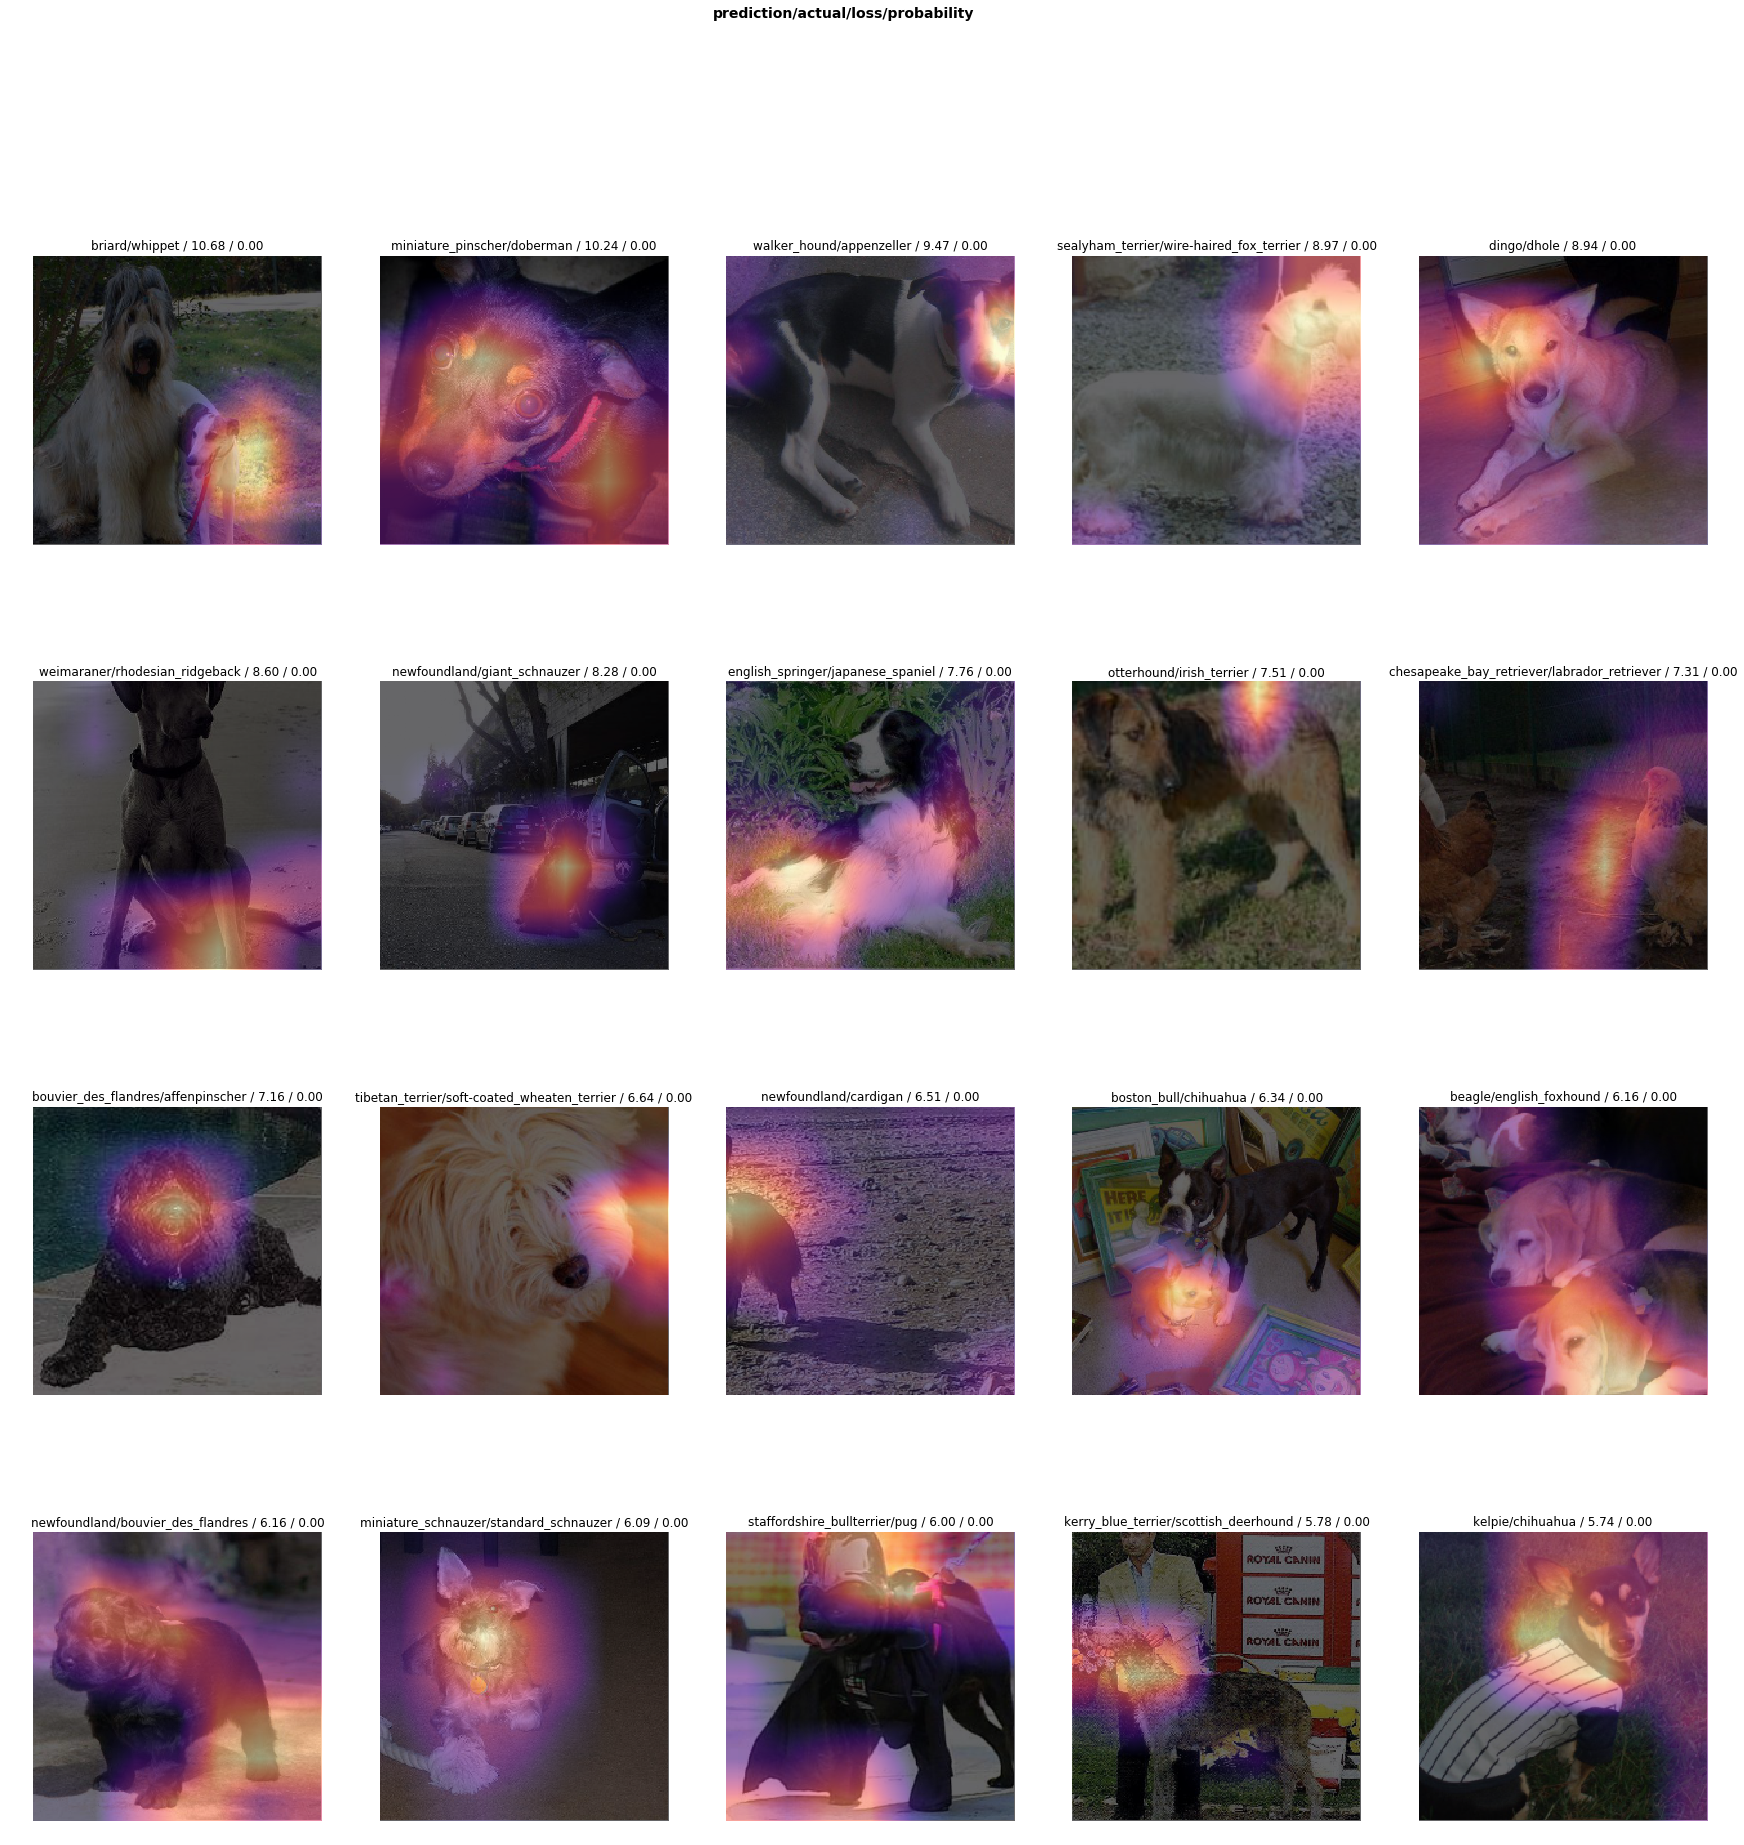

In [52]:
interp.plot_top_losses(20,figsize=(30,30))

In [53]:
interp.most_confused(min_val=3)

[('toy_poodle', 'miniature_poodle', 10),
 ('silky_terrier', 'australian_terrier', 6),
 ('eskimo_dog', 'siberian_husky', 5),
 ('scottish_deerhound', 'irish_wolfhound', 5),
 ('siberian_husky', 'eskimo_dog', 5),
 ('staffordshire_bullterrier', 'american_staffordshire_terrier', 5),
 ('collie', 'shetland_sheepdog', 4),
 ('irish_wolfhound', 'scottish_deerhound', 4),
 ('malamute', 'siberian_husky', 4),
 ('standard_schnauzer', 'giant_schnauzer', 4),
 ('walker_hound', 'english_foxhound', 4),
 ('american_staffordshire_terrier', 'staffordshire_bullterrier', 3),
 ('beagle', 'english_foxhound', 3),
 ('bluetick', 'beagle', 3),
 ('border_collie', 'collie', 3),
 ('cardigan', 'pembroke', 3),
 ('entlebucher', 'appenzeller', 3),
 ('kelpie', 'dingo', 3),
 ('kuvasz', 'great_pyrenees', 3),
 ('lhasa', 'shih-tzu', 3),
 ('shih-tzu', 'lhasa', 3),
 ('tibetan_mastiff', 'newfoundland', 3),
 ('wire-haired_fox_terrier', 'airedale', 3),
 ('yorkshire_terrier', 'australian_terrier', 3)]

# Getting predictions on test dataset

In [0]:
learn.load('stage-2')

accuracy on test dataset (More training is required)

In [55]:
learn.validate(learn.data.test_dl)

[14.453175, tensor(0.0065)]

accuracy on valid dataset

In [57]:
learn.validate()

[0.55994594, tensor(0.8332)]

To check class of any image

In [0]:
img=learn.data.valid_ds[0][0]

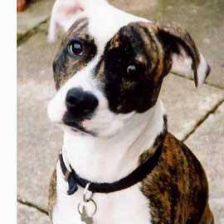

In [60]:
img

In [59]:
learn.predict(img)

(Category american_staffordshire_terrier,
 tensor(4),
 tensor([3.5905e-05, 5.1263e-07, 4.3043e-05, 4.9236e-07, 4.3509e-01, 1.2282e-03,
         3.6190e-05, 3.5292e-02, 2.3207e-04, 2.4436e-04, 3.0908e-05, 1.5301e-06,
         7.4041e-06, 2.3288e-05, 2.7460e-06, 6.3257e-05, 1.7091e-04, 1.3009e-04,
         1.6426e-05, 1.9109e-01, 4.0467e-05, 7.8479e-02, 2.9034e-04, 2.2249e-06,
         5.0668e-05, 5.3146e-04, 3.5732e-06, 2.9915e-02, 3.5729e-05, 5.8131e-04,
         1.2445e-05, 2.4988e-06, 1.8809e-05, 2.7041e-05, 5.6166e-05, 5.6347e-06,
         1.2507e-05, 3.0719e-05, 4.2638e-05, 5.4676e-04, 3.2769e-05, 8.0288e-04,
         4.9055e-05, 1.0305e-04, 9.4749e-06, 2.4738e-02, 5.1317e-05, 3.4915e-04,
         3.8630e-06, 1.5561e-07, 3.0546e-06, 1.0081e-03, 1.2755e-05, 1.7514e-04,
         4.4409e-06, 7.5567e-04, 5.3663e-07, 2.6862e-05, 6.3525e-05, 5.2513e-06,
         5.3167e-03, 2.3986e-05, 1.2964e-05, 1.9745e-04, 7.2970e-04, 1.3629e-05,
         3.2920e-05, 1.8732e-05, 2.3837e-05, 5.7733e-06